In [24]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np


In [31]:
# Load the latest scorecard
scorecard = pd.read_csv("data/shock_reasoning_scorecard.csv")
scorecard.columns = scorecard.columns.str.strip().str.lower()

   patient_id model_name  completeness  clarity  transparency  consistency
0         296       gpt4             5        5             5            5
1         107       gpt4             4        5             4            5
2         184       gpt4             4        5             4            5
3         254       gpt4             3        4             4            5
4         251       gpt4             4        5             4            4
Available columns: ['patient_id', 'model_name', 'completeness', 'clarity', 'transparency', 'consistency']


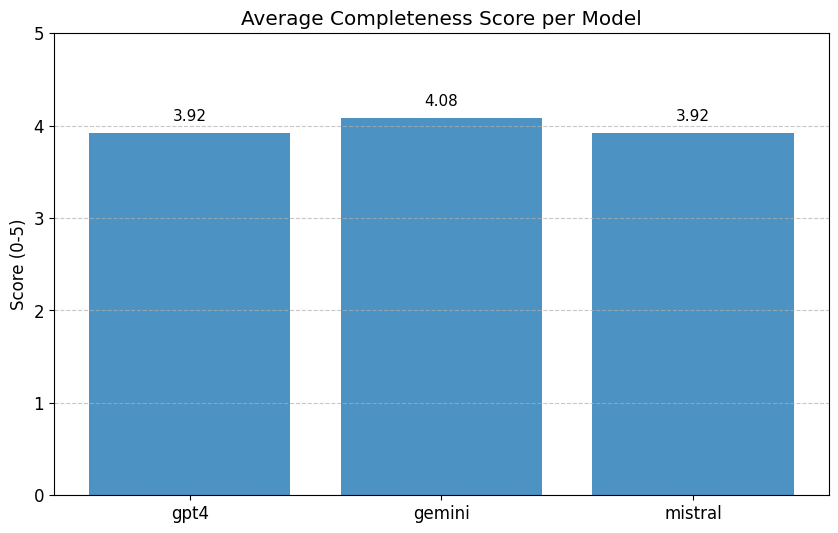

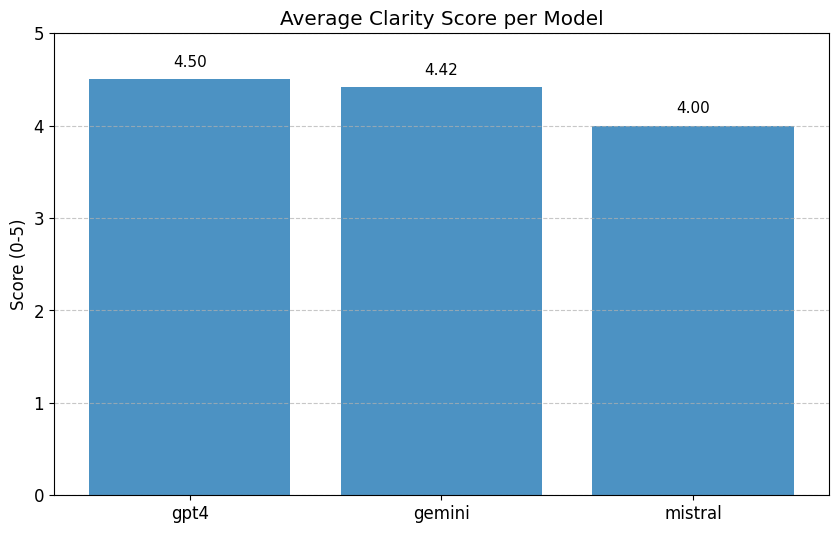

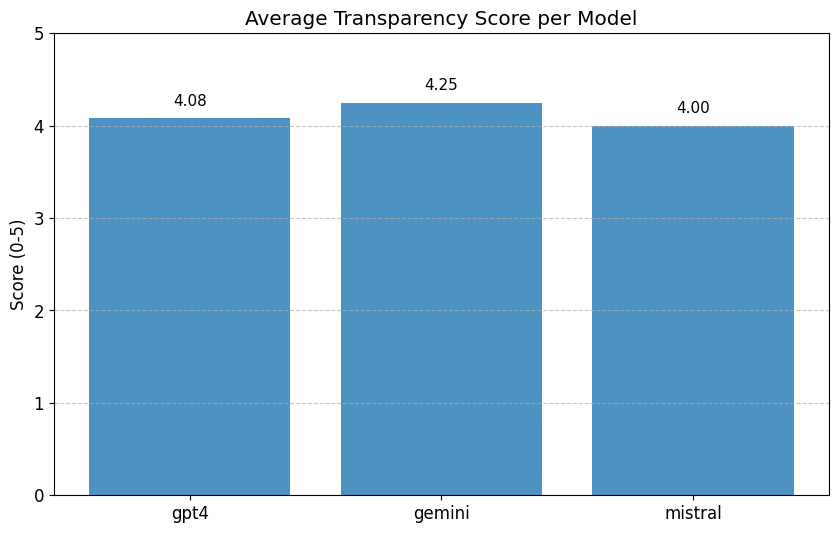

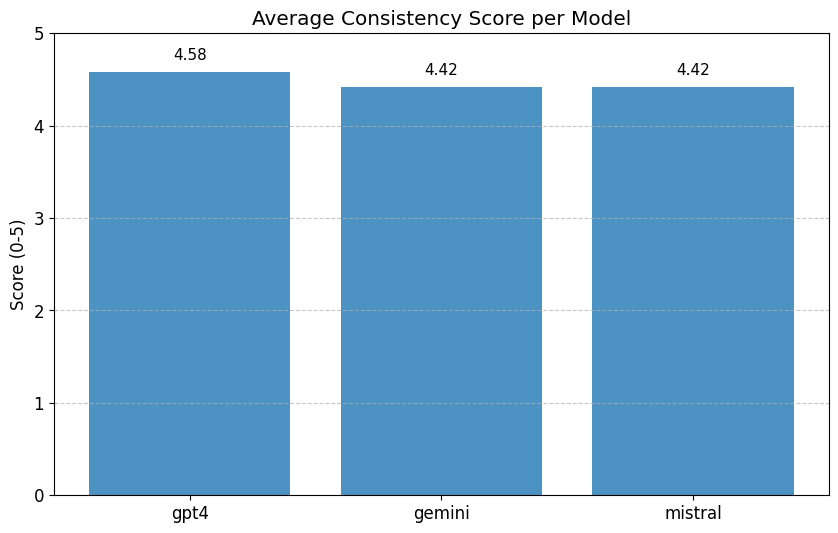

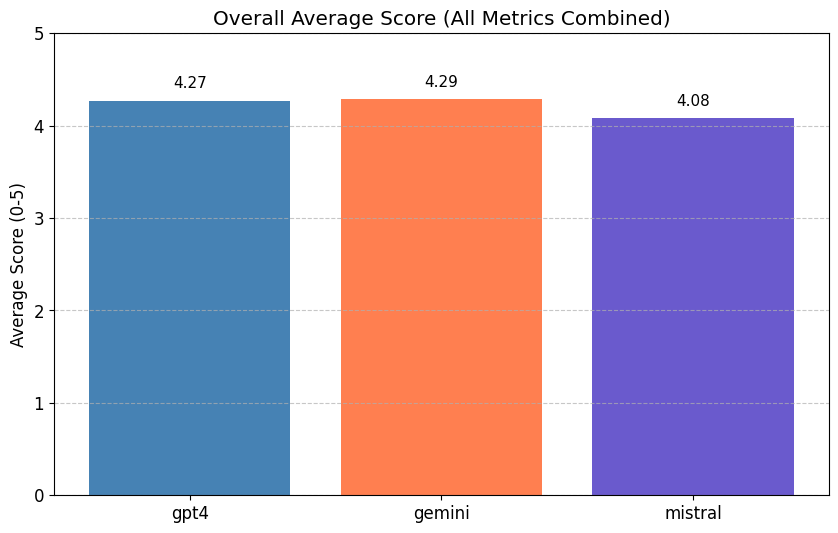

In [33]:
# Fix columns (safety)
scorecard.columns = scorecard.columns.str.strip().str.lower()

# Check
print(scorecard.head())
print("Available columns:", list(scorecard.columns))

# Set a clean font size for plots
plt.rcParams.update({'font.size': 12})

# Metrics and models
metrics = ['completeness', 'clarity', 'transparency', 'consistency']
models = scorecard['model_name'].unique()

# --- Plotting Individual Metrics ---
for metric in metrics:
    plt.figure(figsize=(10, 6))
    averages = []
    for model in models:
        avg_score = scorecard.loc[scorecard['model_name'] == model, metric].mean()
        averages.append(avg_score)

    bars = plt.bar(models, averages, alpha=0.8)
    plt.title(f"Average {metric.capitalize()} Score per Model")
    plt.ylabel("Score (0-5)")
    plt.ylim(0, 5)

    # Add score labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.2f}",
                 ha='center', va='bottom', fontsize=11)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# --- Overall Combined Score ---
plt.figure(figsize=(10, 6))
combined_averages = []
for model in models:
    combined_avg = scorecard.loc[scorecard['model_name'] == model, metrics].mean(axis=1).mean()
    combined_averages.append(combined_avg)

bars = plt.bar(models, combined_averages, color=["#4682B4", "#FF7F50", "#6A5ACD"])
plt.title("Overall Average Score (All Metrics Combined)")
plt.ylabel("Average Score (0-5)")
plt.ylim(0, 5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.2f}",
             ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

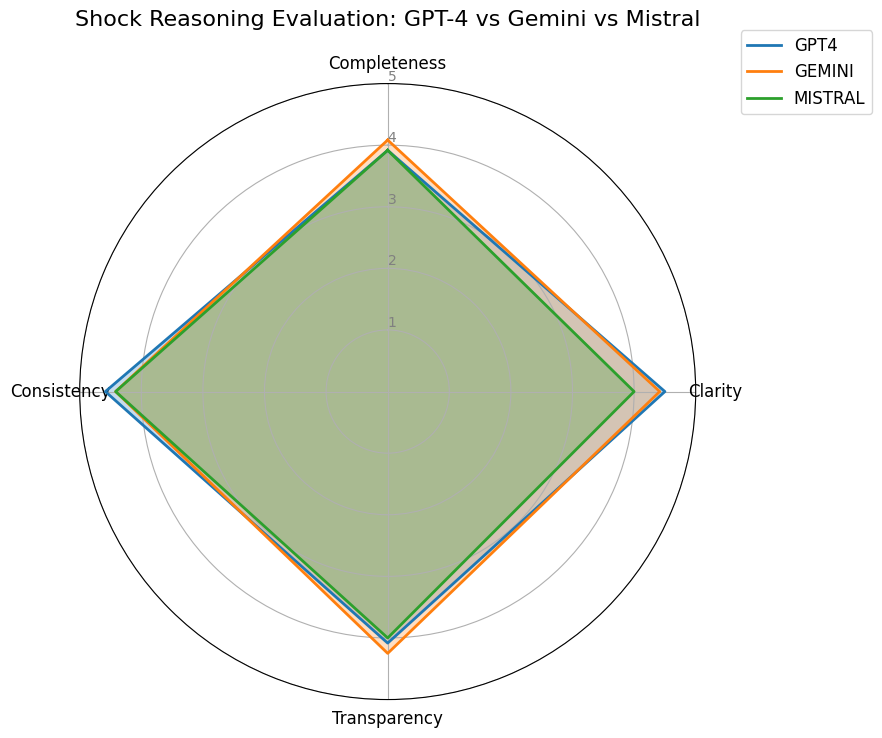

In [34]:
# Calculate mean scores per model
model_scores = {}
for model in models:
    model_scores[model] = [scorecard.loc[scorecard['model_name'] == model, metric].mean() for metric in metrics]

# Setup Radar Chart
labels = metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model
for model, scores in model_scores.items():
    values = scores + scores[:1]  # close the loop
    ax.plot(angles, values, label=model.upper(), linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# Beautify
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=10)
plt.ylim(0, 5)

ax.set_xticks(angles[:-1])
ax.set_xticklabels([label.capitalize() for label in labels])

plt.title("Shock Reasoning Evaluation: GPT-4 vs Gemini vs Mistral", size=16, y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

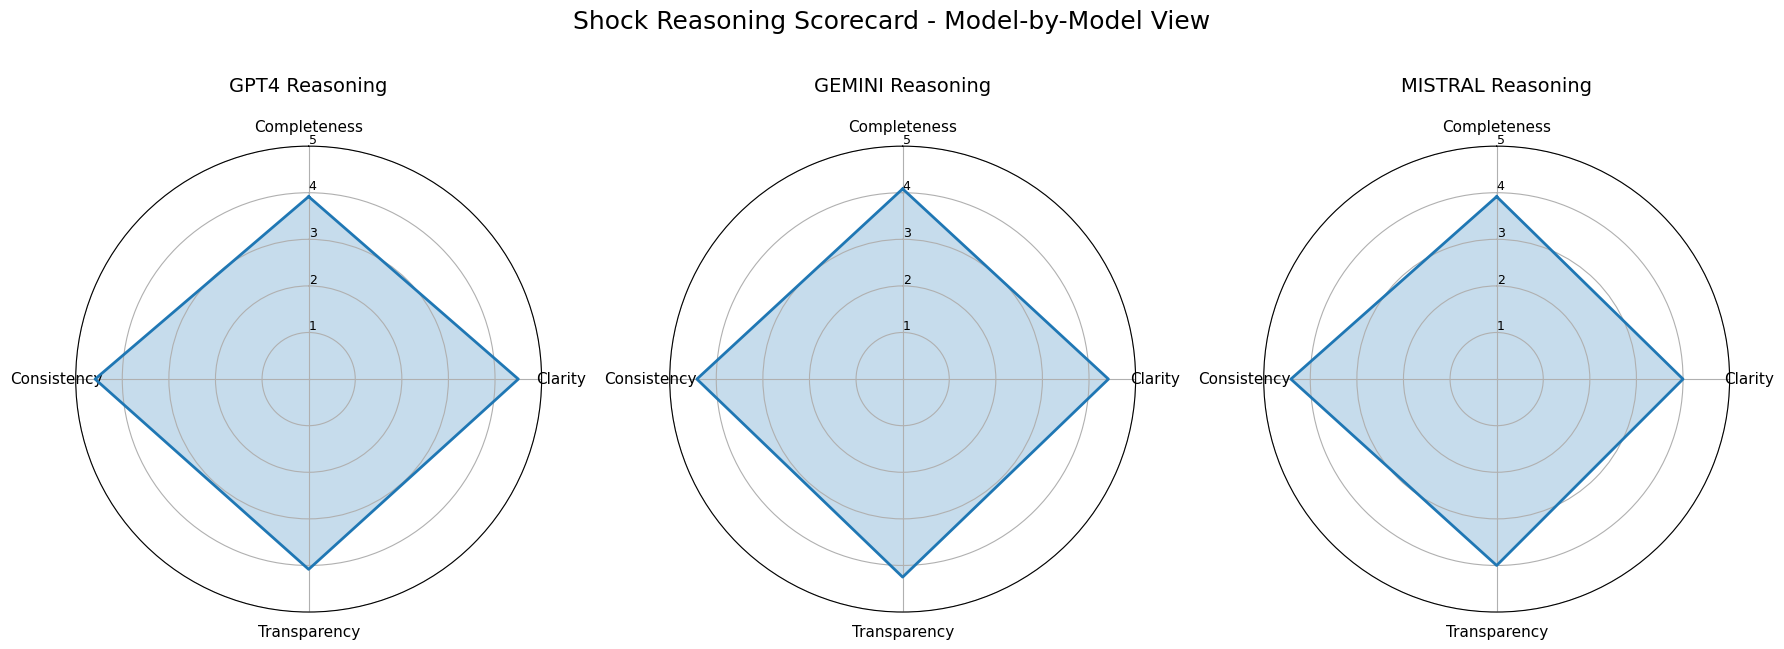

In [35]:
# Calculate mean scores per model
model_scores = {}
for model in models:
    model_scores[model] = [scorecard.loc[scorecard['model_name'] == model, metric].mean() for metric in metrics]

# Setup Radar Chart per model
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Create a figure with 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))

for idx, (model, scores) in enumerate(model_scores.items()):
    ax = axes[idx]
    values = scores + scores[:1]  # close the loop

    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_title(f"{model.upper()} Reasoning", size=14, y=1.1)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_rlabel_position(0)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([label.capitalize() for label in labels], fontsize=11)
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels(["1", "2", "3", "4", "5"], fontsize=9)
    ax.set_ylim(0, 5)

plt.suptitle("Shock Reasoning Scorecard - Model-by-Model View", size=18, y=1.05)
plt.tight_layout()
plt.show()

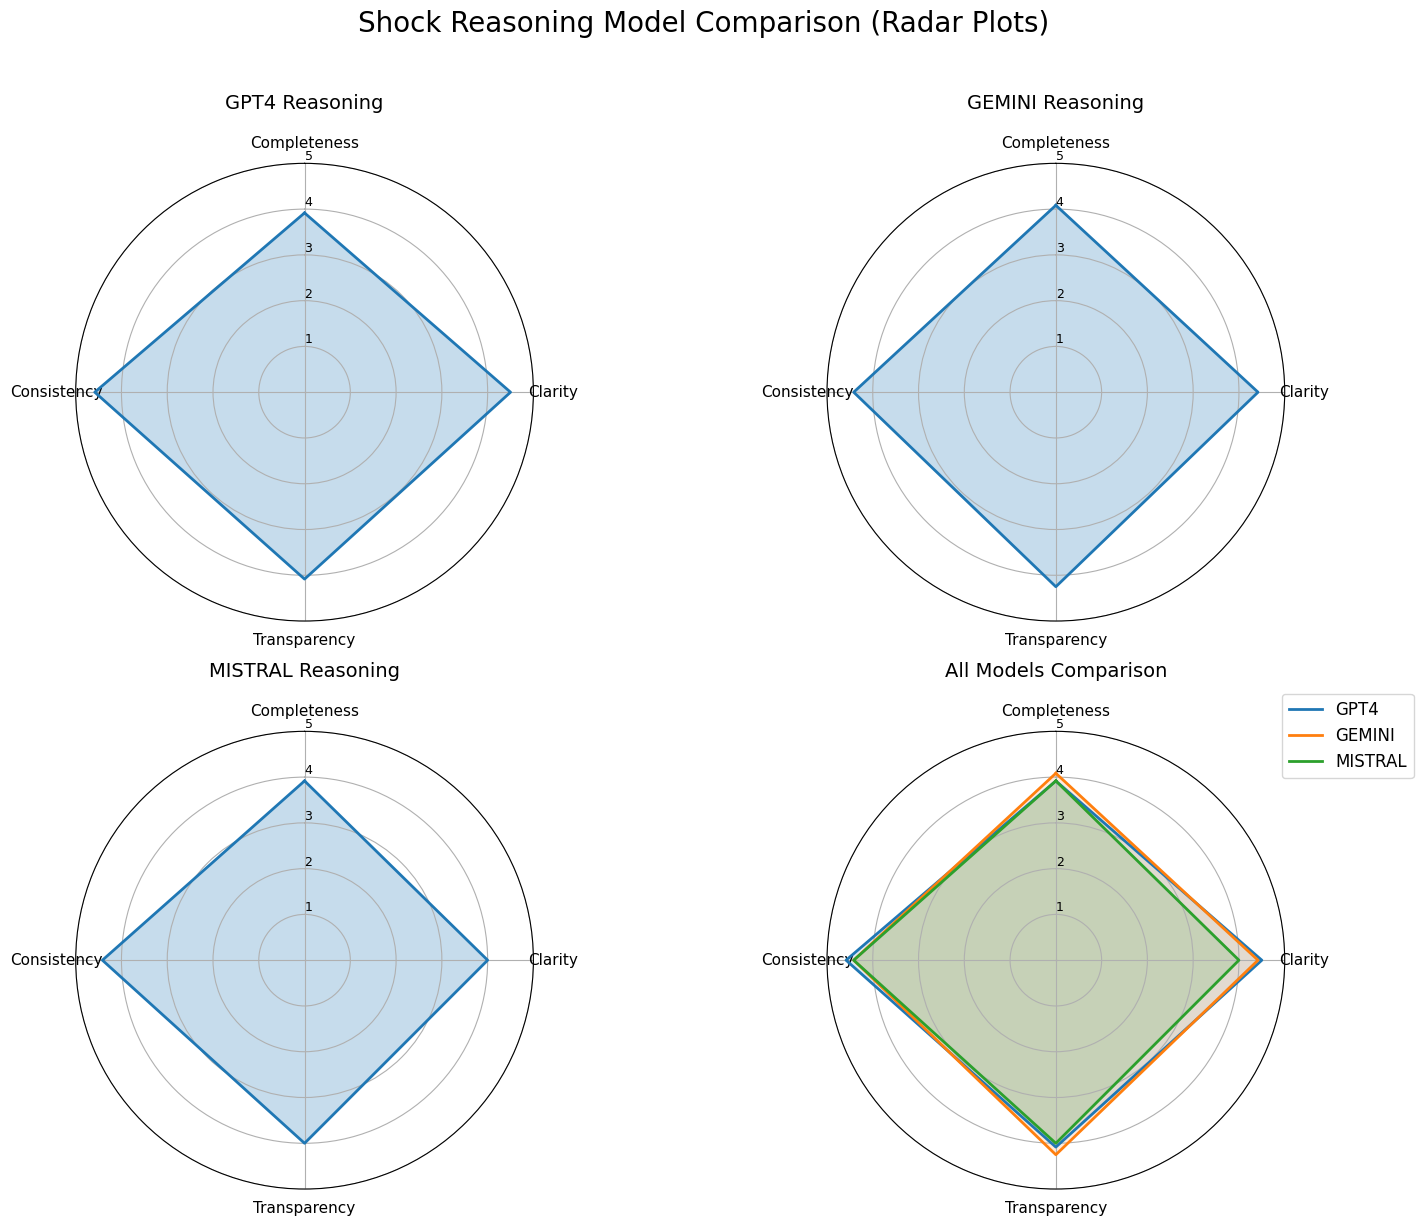

In [36]:
# Calculate mean scores per model
model_scores = {}
for model in models:
    model_scores[model] = [scorecard.loc[scorecard['model_name'] == model, metric].mean() for metric in metrics]

# Setup Radar Chart
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Create 2x2 Subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12), subplot_kw=dict(polar=True))
axes = axes.flatten()

# Plot Individual Charts
for idx, (model, scores) in enumerate(model_scores.items()):
    ax = axes[idx]
    values = scores + scores[:1]

    ax.plot(angles, values, linewidth=2, label=model.upper())
    ax.fill(angles, values, alpha=0.25)

    ax.set_title(f"{model.upper()} Reasoning", size=14, y=1.1)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_rlabel_position(0)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([label.capitalize() for label in labels], fontsize=11)
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels(["1", "2", "3", "4", "5"], fontsize=9)
    ax.set_ylim(0, 5)

# Plot Overlapping Chart (All models)
ax = axes[3]
for model, scores in model_scores.items():
    values = scores + scores[:1]
    ax.plot(angles, values, linewidth=2, label=model.upper())
    ax.fill(angles, values, alpha=0.15)

ax.set_title("All Models Comparison", size=14, y=1.1)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
ax.set_xticks(angles[:-1])
ax.set_xticklabels([label.capitalize() for label in labels], fontsize=11)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(["1", "2", "3", "4", "5"], fontsize=9)
ax.set_ylim(0, 5)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.suptitle("Shock Reasoning Model Comparison (Radar Plots)", size=20, y=1.02)
plt.tight_layout()
plt.show()